# Submission details
## Name: Callum Freeburn
## Model: VGG16

Note: I could not pass variables into shell commands, tried for hours but could not get it to work so hard coded when needed.

# Import Libraries & Mount to Google Drive

In [ ]:
import numpy as np
import pandas as pd
import os 
import tarfile
from PIL import Image 
import random
!pip install wget
import wget
import cv2
import tensorflow as tf
import keras
import shutil
import matplotlib.pyplot as plt

# for Models
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.models import Sequential, Model
from keras.callbacks import CSVLogger
from keras.preprocessing import image
from sklearn.metrics import classification_report


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4390ff9917f01bfcbaad716deb303629b84b08c6bb764635c51e76576c8c0ba8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Flowers17 Data Preparation


In [ ]:
# create Flowers17 folder for data 
dataset_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data'
tgz_filename = "17flowers.tgz"
download_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz'
filepath = os.path.join(dataset_dir, tgz_filename)

if not os.path.exists(dataset_dir):
  os.mkdir(dataset_dir)
  print("Flowers17_Data folder created")

Flowers17_Data folder created


In [ ]:
# if tgz file containing has not been downloaded, download the file and extract it
extractedfilepath = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/'
if not os.path.exists(filepath):
  wget.download(download_url, dataset_dir) 
if os.path.exists(filepath):
  tar = tarfile.open(filepath)
  tar.extractall(extractedfilepath)
  tar.close()
  print('file extracted')

file extracted


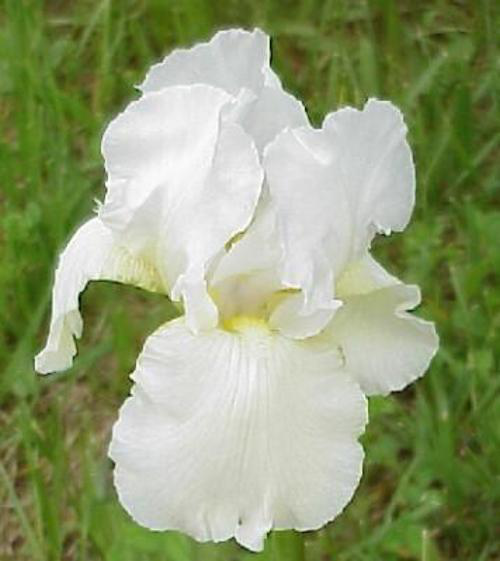

In [ ]:
# display random image from flowers17 dataset to show that it has worked
random_flower = random.choice(os.listdir(extractedfilepath + "/jpg/"))
Image.open(extractedfilepath + "/jpg/" + random_flower)

In [ ]:
# create folders for train, validation and test and then create a folder for each of the 17 classes within the dataset split folders
os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/train')
os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/validation')
os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/test')

for i in range(1, 18):
    os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/train/' + str(i))
    os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/validation/' + str(i))
    os.mkdir(r'/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/test/' + str(i))
print('All datasplit and class folders created')

All datasplit and class folders created


In [ ]:
# As the images are sorted in 80 image sections, meaning each 80 images represnt a class, this function read the split test file and places each image into its repected class folder within the split folder e.g (training)
def sort_flower_images(setType, setTxtFile):
  with open(extractedfilepath + setTxtFile, "r") as f:
    datafile = f.readlines()

    for i in range(1, 1361):

          findImage = "image_" +  str(i).zfill(4) + ".jpg"
          for line in datafile:
            if findImage in line:
              imageNumber = int(findImage.replace('image_', '').replace('.jpg', ''))
              jpgorginalloc = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/jpg/' + findImage
              newlocationbase = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/'

              if imageNumber <= 80:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/1/' + findImage)
                # print('Inserted ' + findImage + 'into class 1')

              elif imageNumber >= 81 and imageNumber <= 160:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/2/' + findImage)
                # print('Inserted ' + findImage + 'into class 2') 

              elif imageNumber >= 161 and imageNumber <= 240:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/3/' + findImage)
                # print('Inserted ' + findImage + 'into class 3')

              elif imageNumber >= 241 and imageNumber <= 320:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/4/' + findImage)
                # print('Inserted ' + findImage + 'into class 4')

              elif imageNumber >= 321 and imageNumber <= 400:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/5/' + findImage)
                # print('Inserted ' + findImage + 'into class 5')

              elif imageNumber >= 401 and imageNumber <= 480:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/6/' + findImage)
                # print('Inserted ' + findImage + 'into class 6')

              elif imageNumber >= 481 and imageNumber <= 560:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/7/' + findImage)
                # print('Inserted ' + findImage + 'into class 7')

              elif imageNumber >= 561 and imageNumber <= 640:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/8/' + findImage)
                # print('Inserted ' + findImage + 'into class 8')

              elif imageNumber >= 641 and imageNumber <= 780:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/9/' + findImage)
                # print('Inserted ' + findImage + 'into class 9') 

              elif imageNumber >= 781 and imageNumber <= 860:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/10/' + findImage)
                # print('Inserted ' + findImage + 'into class 10') 

              elif imageNumber >= 861 and imageNumber <= 940:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/11/' + findImage)
                # print('Inserted ' + findImage + 'into class 11')

              elif imageNumber >= 941 and imageNumber <= 1020:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/12/' + findImage)
                # print('Inserted ' + findImage + 'into class 12') 

              elif imageNumber >= 1021 and imageNumber <= 1100:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/13/' + findImage)
                # print('Inserted ' + findImage + 'into class 13')

              elif imageNumber >= 1101 and imageNumber <= 1180:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/14/' + findImage)
                # print('Inserted ' + findImage + 'into class 14')

              elif imageNumber >= 1181 and imageNumber <= 1260:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/15/' + findImage)
                # print('Inserted ' + findImage + 'into class 15')

              elif imageNumber >= 1261 and imageNumber <= 1340:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/16/' + findImage)
                # print('Inserted ' + findImage + 'into class 16')

              elif imageNumber >= 1341  and imageNumber <= 1361:
                shutil.copy(jpgorginalloc, newlocationbase + setType + '/17/' + findImage)
                # print('Inserted ' + findImage + 'into class 17')    

              else:
                print('could not find number')
                pass

  print('Sucessfully sorted all images from ' + setTxtFile)
  pass


In [ ]:
# Using TrainSet1, ValSet1 and TestSet1 - Please import into Flowers17_Data dir as unable to automate download
# call the function above for the respected txt files
%cd '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data'
sort_flower_images('train', 'TrainSet1.txt')
sort_flower_images('validation', 'ValSet1.txt')
sort_flower_images('test', 'TestSet1.txt')

/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data
Sucessfully sorted all images from TrainSet1.txt
Sucessfully sorted all images from ValSet1.txt
Sucessfully sorted all images from TestSet1.txt


In [ ]:
# create a dict to give the class folders the correct names
correct_class_dict = {}
correct_class_dict['1'] = 'Daffodil'
correct_class_dict['2'] = 'Snowdrop'
correct_class_dict['3'] = 'LilyValley'
correct_class_dict['4'] = 'Bluebell'
correct_class_dict['5'] = 'Crocus'
correct_class_dict['6'] = 'Iris'
correct_class_dict['7'] = 'Tigerlily'
correct_class_dict['8'] = 'Tulip'
correct_class_dict['9'] = 'Fritillary'
correct_class_dict['10'] = 'Sunflower'
correct_class_dict['11'] = 'Daisy'
correct_class_dict['12'] = 'ColtsFoot'
correct_class_dict['13'] = 'Dandelion'
correct_class_dict['14'] = 'Cowslip'
correct_class_dict['15'] = 'Buttercup'
correct_class_dict['16'] = 'Windflower'
correct_class_dict['17'] = 'Pansy'

print('created class dict')

created class dict


In [ ]:
# loop through dict to rename the folders

for i in range(1, 18):
    os.rename('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/train/' + str(i), '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/train/' + correct_class_dict[str(i)])
    os.rename('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/validation/' + str(i), '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/validation/' + correct_class_dict[str(i)])
    os.rename('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/test/' + str(i), '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/test/' + correct_class_dict[str(i)])
print('Successfuly renamed class folders')

Successfuly renamed class folders


# Data Augmentation


In [ ]:
# create varibles for datasplit folders
train_images_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/train'
validation_images_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/validation'
test_images_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/test'
print('created dir variables for data augmentation')

created dir variables for data augmentation


In [ ]:
# create Data augmentation and image generator for flowers17 dataset
# normalize as well as create a larger dataset
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=180,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest') 

# normalize the data
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_images_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    validation_images_dir, # same directory as training data
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_images_dir, 
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


# Baseline VGG16 Model

In [ ]:
# #baseline pretained VGG16 model
VGG16_base = VGG16(weights= "imagenet" , include_top=False, pooling='avg')
VGG16_base.trainable = False
VGG16_base.summary()

# add VGG16 base and output layer
baseline_VGG16_model = Sequential()
baseline_VGG16_model.add(VGG16_base)
baseline_VGG16_model.add(Dense(17, activation='softmax'))

# model summary
baseline_VGG16_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

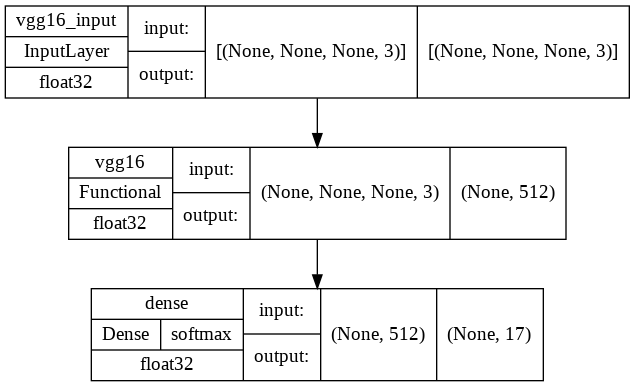

In [ ]:
tf.keras.utils.plot_model(
    baseline_VGG16_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [ ]:
# if we need to load model from dir
baseline_load_model_dir ='/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_baseline_VGG16_model_checkpoints'
baseline_VGG16_model = tf.keras.models.load_model(baseline_load_model_dir + '/VGG16_baseline_model.hdf5')
baseline_VGG16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_1 (Dense)             (None, 17)                8721      
                                                                 
Total params: 14,723,409
Trainable params: 8,721
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# configure model to create checkpoint every epoch
filepath_of_weights= baseline_load_model_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath_of_weights, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
# configure model to append to csv file every epoch for history
baseline_model_history_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_baseline_VGG16_CSVLogger_checkpoints'
csv_logger = CSVLogger(baseline_model_history_dir + "/baseline_model_history.csv", append=True)

In [ ]:
# complie the model
baseline_VGG16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the baseline model
baseline_VGG16_model_history = baseline_VGG16_model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples/train_generator.batch_size, # as 680 images = 34 steps  * 20 batches
        epochs= 60,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples/validation_generator.batch_size, # as 340 images = 34 steps  * 10 batches
        callbacks = [checkpoint, csv_logger],
        verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/60
34/34 [==============================] - 717s 21s/step - loss: 1.2333 - accuracy: 0.6779 - val_loss: 1.3456 - val_accuracy: 0.6294
Epoch 2/60
34/34 [==============================] - 19s 560ms/step - loss: 1.1982 - accuracy: 0.6897 - val_loss: 1.3140 - val_accuracy: 0.6647
Epoch 3/60
34/34 [==============================] - 19s 555ms/step - loss: 1.1778 - accuracy: 0.7029 - val_loss: 1.3410 - val_accuracy: 0.6235
Epoch 4/60
34/34 [==============================] - 19s 556ms/step - loss: 1.1619 - accuracy: 0.6985 - val_loss: 1.3291 - val_accuracy: 0.6353
Epoch 5/60
34/34 [==============================] - 19s 558ms/step - loss: 1.1608 - accuracy: 0.6956 - val_loss: 1.2966 - val_accuracy: 0.6441
Epoch 6/60
34/34 [==============================] - 19s 568ms/step - loss: 1.1587 - accuracy: 0.7132 - val_loss: 1.2989 - val_accuracy: 0.6324
Epoch 7/60
34/34 [==============================] - 19s 566ms/step - loss: 1.1367 - accuracy: 0.6868 - val_loss: 1.2709 - val_accuracy: 0.6382


### Evaluating the Model

In [ ]:
# as the model had to be trained over serval runs the epochs would increment from the previous run, this function fixes the csv to reflect the correct epochs
df = pd.read_csv(baseline_model_history_dir + "/baseline_model_history.csv", index_col=False)
df['epoch'] = np.arange(len(df)) + 1
df.to_csv(baseline_model_history_dir + "/baseline_model_history.csv", index=False)
print('successfuly ammened the epochs')

successfuly ammened the epochs


In [ ]:
# read the csv to show the data
baseline_model_history = pd.read_csv(baseline_model_history_dir + "/baseline_model_history.csv", sep=',', engine='python')

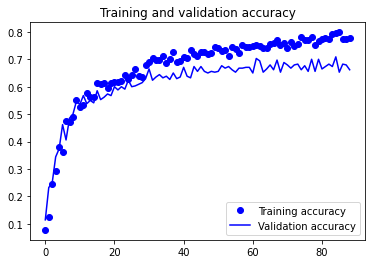

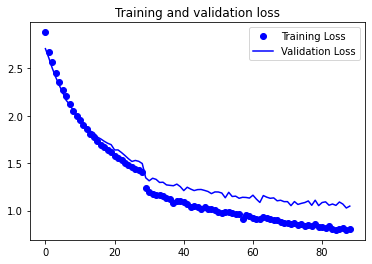

In [ ]:
#plot graphs of training and validation

acc = baseline_model_history['accuracy']
val_acc = baseline_model_history['val_accuracy']
loss = baseline_model_history['loss']
val_loss = baseline_model_history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# get test accuracy and predictions

filenames = test_generator.filenames
nb_samples = len(filenames)

baseline_VGG16_model_predict = baseline_VGG16_model.predict_generator(test_generator,steps = nb_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
scores = baseline_VGG16_model.evaluate_generator(test_generator)
print("\n%s%s: %.2f%%" % ("Testing ",baseline_VGG16_model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.



Testing accuracy: 69.71%


In [ ]:
# get classification report
test_labels = test_generator.classes
y_pred = np.argmax(baseline_VGG16_model_predict, axis = 1)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.60      0.45      0.51        20
           2       0.68      0.65      0.67        20
           3       0.55      0.60      0.57        20
           4       0.63      0.60      0.62        20
           5       0.84      0.80      0.82        20
           6       0.80      0.80      0.80        20
           7       0.35      0.40      0.37        20
           8       0.88      0.78      0.83        37
           9       0.81      0.85      0.83        20
          10       1.00      0.65      0.79        20
          11       0.00      0.00      0.00         3
          12       0.82      0.70      0.76        20
          13       0.77      0.85      0.81        20
          14       0.85      0.85      0.85        20
          15       0.55      0.60      0.57        20
          16       0.48      0.80      0.60        20

    accuracy              

In [ ]:
#Show the Testset images with predictions and accuracy
num_class_dict=test_generator.class_indices 
reverse_dict={}
for key, value in num_class_dict.items():
    reverse_dict[value]=key   

for i , p in enumerate(baseline_VGG16_model_predict):
  image_name = str(filenames[i].split('/')[1])
  index=np.argmax(p)
  flowers_class=reverse_dict[index]    
  prob=p[index]
  print('for file', image_name, ' predicted class is ', flowers_class,' with a probability of ',prob)
  img = image.load_img('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/jpg/' + image_name, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

# Finetuned VGG16 Models

## Adding Conv Layers Model

In [ ]:
# Adding 2 Conv Layers and TC Layers

VGG16_base = VGG16(weights= "imagenet" , include_top=False, input_shape=(224, 224, 3))
VGG16_base.summary()

# making it so the VGG16 base cannot be trained
for i, layer in enumerate(VGG16_base.layers):
    layer.trainable = False
    print(i, layer.name, layer.trainable)

# add extra con layers
add_conv_finetuned_VGG16_model = Sequential()
add_conv_finetuned_VGG16_model.add(VGG16_base)
add_conv_finetuned_VGG16_model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same", activation="relu"))
add_conv_finetuned_VGG16_model.add(Conv2D(filters=32,kernel_size=(2,2),padding="same", activation="relu"))
add_conv_finetuned_VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

add_conv_finetuned_VGG16_model.add(Flatten())
add_conv_finetuned_VGG16_model.add(Dropout(0.8))
# dropping at 0.8 randomly to prevent overfitting
add_conv_finetuned_VGG16_model.add(Dense(512, activation='relu'))
add_conv_finetuned_VGG16_model.add(Dense(17, activation='softmax')) # output layer

add_conv_finetuned_VGG16_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
finetuned_load_model_dir ='/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_finetuned_VGG16_model_checkpoints'
add_conv_finetuned_VGG16_model = tf.keras.models.load_model(finetuned_load_model_dir + '/add_2_conv_layers.hdf5')

# model summary
add_conv_finetuned_VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 32)          65568     
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dropout (Dropout)           (None, 288)               0         
                                                        

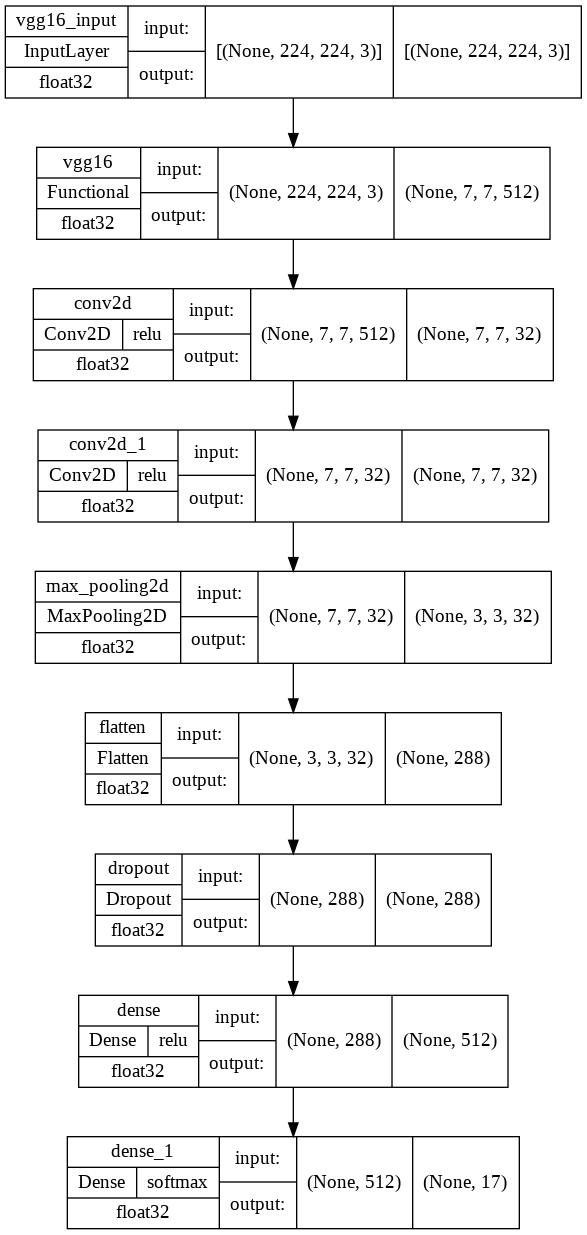

In [ ]:
tf.keras.utils.plot_model(
    add_conv_finetuned_VGG16_model,
    to_file=finetuned_load_model_dir + '/addlayers_model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [ ]:
filepath_of_weights= finetuned_load_model_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath_of_weights, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
# configure model to append to csv file every epoch for history
finetuned_model_history_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_finetuned_VGG16_CSVLogger_checkpoints'
csv_logger = CSVLogger(finetuned_model_history_dir + "/add_2_conv_layers.csv", append=True)


In [ ]:
add_conv_finetuned_VGG16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
add_conv_finetuned_model_history = add_conv_finetuned_VGG16_model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples//train_generator.batch_size, # as 680 images = 34 steps  * 20 batches
        epochs= 100,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples//validation_generator.batch_size, # as 340 images = 34 steps  * 10 batches
        callbacks = [checkpoint, csv_logger],
        verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
34/34 [==============================] - 23s 613ms/step - loss: 2.8596 - accuracy: 0.0882 - val_loss: 2.7264 - val_accuracy: 0.1176
Epoch 2/100
34/34 [==============================] - 19s 554ms/step - loss: 2.6970 - accuracy: 0.1103 - val_loss: 2.5426 - val_accuracy: 0.1647
Epoch 3/100
34/34 [==============================] - 19s 559ms/step - loss: 2.5475 - accuracy: 0.1441 - val_loss: 2.3848 - val_accuracy: 0.2294
Epoch 4/100
34/34 [==============================] - 19s 559ms/step - loss: 2.4293 - accuracy: 0.1941 - val_loss: 2.2803 - val_accuracy: 0.2324
Epoch 5/100
34/34 [==============================] - 19s 562ms/step - loss: 2.3868 - accuracy: 0.2044 - val_loss: 2.0786 - val_accuracy: 0.3118
Epoch 6/100
34/34 [==============================] - 20s 578ms/step - loss: 2.2015 - accuracy: 0.2471 - val_loss: 1.9230 - val_accuracy: 0.3647
Epoch 7/100
34/34 [==============================] - 20s 586ms/step - loss: 2.0571 - accuracy: 0.3103 - val_loss: 1.9032 - val_accuracy:

### Evaluating the Model

In [ ]:
# as the model had to be trained over serval runs the epochs would increment from the previous run, this function fixes the csv to reflect the correct epochs
df = pd.read_csv(finetuned_model_history_dir + "/add_2_conv_layers.csv", index_col=False)
df['epoch'] = np.arange(len(df)) + 1
df.to_csv(finetuned_model_history_dir + "/add_2_conv_layers.csv", index=False)
print('successfuly ammened the epochs')

successfuly ammened the epochs


In [ ]:
# read the csv to show the data
add_conv_finetuned_model_history = pd.read_csv(finetuned_model_history_dir + "/add_2_conv_layers.csv", sep=',', engine='python')

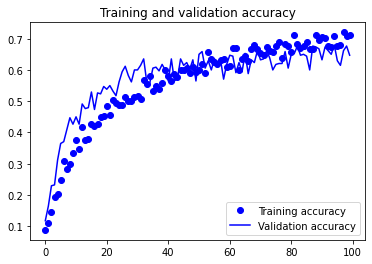

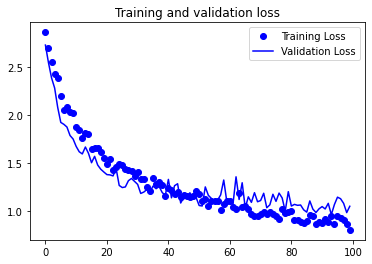

In [ ]:
#plot graphs of training and validation

acc = add_conv_finetuned_model_history['accuracy']
val_acc = add_conv_finetuned_model_history['val_accuracy']
loss = add_conv_finetuned_model_history['loss']
val_loss = add_conv_finetuned_model_history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# get test accuracy and predictions

filenames = test_generator.filenames
nb_samples = len(filenames)

add_conv_finetuned_VGG16_model_predictions = add_conv_finetuned_VGG16_model.predict_generator(test_generator,steps = nb_samples)

scores = add_conv_finetuned_VGG16_model.evaluate_generator(test_generator)
print("\n%s%s: %.2f%%" % ("Testing ",add_conv_finetuned_VGG16_model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  



Testing accuracy: 70.59%


In [ ]:
# get classification report
test_labels = test_generator.classes
y_pred = np.argmax(add_conv_finetuned_VGG16_model_predictions, axis = 1)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.67      0.30      0.41        20
           2       0.81      0.65      0.72        20
           3       0.46      0.85      0.60        20
           4       0.76      0.65      0.70        20
           5       0.79      0.55      0.65        20
           6       0.80      0.80      0.80        20
           7       0.38      0.25      0.30        20
           8       0.89      0.92      0.91        37
           9       1.00      0.75      0.86        20
          10       0.88      0.70      0.78        20
          11       0.00      0.00      0.00         3
          12       0.62      0.80      0.70        20
          13       0.94      0.85      0.89        20
          14       0.75      0.60      0.67        20
          15       0.51      0.90      0.65        20
          16       0.51      0.90      0.65        20

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Show the Testset images with predictions and accuracy
num_class_dict=test_generator.class_indices 
reverse_dict={}
for key, value in num_class_dict.items():
    reverse_dict[value]=key   

for i , p in enumerate(add_conv_finetuned_VGG16_model_predictions):
  image_name = str(filenames[i].split('/')[1])
  index=np.argmax(p)
  flowers_class=reverse_dict[index]    
  prob=p[index]
  print('for file', image_name, ' predicted class is ', flowers_class,'with a probability of',prob)
  img = image.load_img('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/jpg/' + image_name, target_size=(224, 224))
  plt.imshow(img)
  plt.show()

## Remove 2 Conv Layers Model

In [ ]:
#Fine tune pretained VGG16 model
VGG16_base = VGG16(weights= "imagenet" , include_top=False, input_shape=(224, 224, 3))

# removed 2 conv layers and global_average_pooling2d_2
VGG16_base = Model(VGG16_base.input, VGG16_base.layers[-3].output)

# Check the trainable status of the individual layers

for i, layer in enumerate(VGG16_base.layers):
    layer.trainable = False
    print(i, layer.name, layer.trainable)

VGG16_base.summary()

# add FC layers and pooling
rmv_layers_finetuned_VGG16_model = Sequential()
rmv_layers_finetuned_VGG16_model.add(VGG16_base)
rmv_layers_finetuned_VGG16_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

rmv_layers_finetuned_VGG16_model.add(Flatten())
rmv_layers_finetuned_VGG16_model.add(Dropout(0.8))
# drop 0.8 with dropout layer to avoid overfitting
rmv_layers_finetuned_VGG16_model.add(Dense(512, activation='relu'))
rmv_layers_finetuned_VGG16_model.add(Dense(17, activation='softmax')) # output layer

for i, layer in enumerate(rmv_layers_finetuned_VGG16_model.layers):
    print(i, layer.name, layer.trainable)

# model summary
rmv_layers_finetuned_VGG16_model.summary()

In [ ]:
# if we need to load model from dir
finetuned_load_model_dir ='/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_finetuned_VGG16_model_checkpoints/'
rmv_layers_finetuned_VGG16_model = tf.keras.models.load_model(finetuned_load_model_dir + 'rmv_2_layers_model.hdf5')

# model summary
rmv_layers_finetuned_VGG16_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3 (Functional)        (None, 14, 14, 512)       12354880  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 512)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_5 (Dropout)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 dense_7 (Dense)             (None, 17)                8721      
                                                      

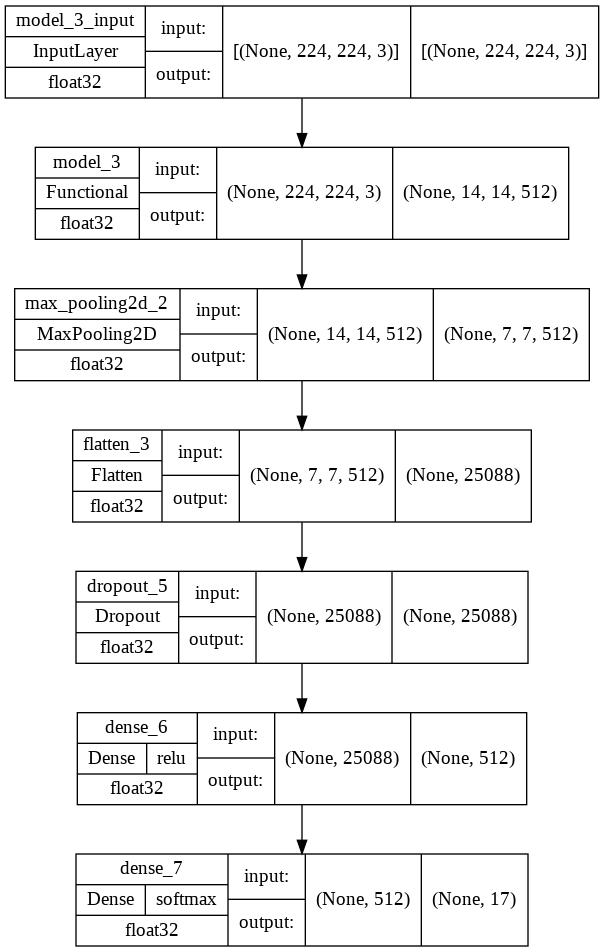

In [ ]:
tf.keras.utils.plot_model(
    rmv_layers_finetuned_VGG16_model,
    to_file=finetuned_load_model_dir + '/rmvlayers_model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [ ]:
filepath_of_weights= finetuned_load_model_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath_of_weights, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [ ]:
# configure model to append to csv file every epoch for history
finetuned_model_history_dir = '/content/drive/My Drive/42028/Assignment2/Image_Detection/flowers17_finetuned_VGG16_CSVLogger_checkpoints'
csv_logger = CSVLogger(finetuned_model_history_dir + "/rmv_2_layers_history.csv", append=True)

In [ ]:
rmv_layers_finetuned_VGG16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
rmv_layers_finetuned_VGG16_model_history = rmv_layers_finetuned_VGG16_model.fit_generator(
        train_generator,
        steps_per_epoch= train_generator.samples//train_generator.batch_size, # as 680 images = 34 steps  * 20 batches
        epochs= 1,
        validation_data=validation_generator,
        validation_steps= validation_generator.samples//validation_generator.batch_size, # as 340 images = 34 steps  * 10 batches
        callbacks = [checkpoint, csv_logger],
        verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


34/34 [==============================] - 468s 14s/step - loss: 0.8196 - accuracy: 0.7250 - val_loss: 0.8916 - val_accuracy: 0.7147


### Evaluating the Model

In [ ]:
# as the model had to be trained over serval runs the epochs would increment from the previous run, this function fixes the csv to reflect the correct epochs
df = pd.read_csv(finetuned_model_history_dir + "/rmv_2_layers_history.csv", index_col=False)
df['epoch'] = np.arange(len(df)) + 1
df.to_csv(finetuned_model_history_dir + "/rmv_2_layers_history.csv", index=False)
print('successfuly ammened the epochs')

successfuly ammened the epochs


In [ ]:
# read the csv to show the data
rmv_conv_finetuned_model_history = pd.read_csv(finetuned_model_history_dir + "/rmv_2_layers_history.csv", sep=',', engine='python')

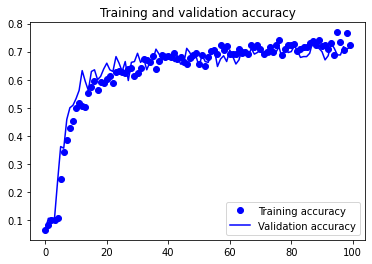

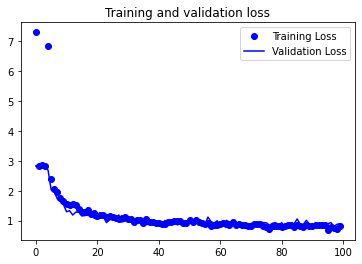

In [ ]:
#plot graphs of training and validation

acc = rmv_conv_finetuned_model_history['accuracy']
val_acc = rmv_conv_finetuned_model_history['val_accuracy']
loss = rmv_conv_finetuned_model_history['loss']
val_loss = rmv_conv_finetuned_model_history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# get test accuracy and predictions

filenames = test_generator.filenames
nb_samples = len(filenames)

rmv_conv_finetuned_VGG16_model_predictions = rmv_layers_finetuned_VGG16_model.predict_generator(test_generator,steps = nb_samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
#scores = rmv_layers_finetuned_VGG16_model.evaluate_generator(test_generator)
print("\n%s%s: %.2f%%" % ("Testing",rmv_layers_finetuned_VGG16_model.metrics_names[1], scores[1]*100))


Testingaccuracy: 78.82%


In [ ]:
# get classification report
test_labels = test_generator.classes
y_pred = np.argmax(rmv_conv_finetuned_VGG16_model_predictions, axis = 1)

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.81      0.65      0.72        20
           2       0.86      0.60      0.71        20
           3       0.79      0.75      0.77        20
           4       0.85      0.85      0.85        20
           5       0.94      0.80      0.86        20
           6       0.76      0.80      0.78        20
           7       0.64      0.45      0.53        20
           8       0.97      0.81      0.88        37
           9       0.83      0.95      0.88        20
          10       0.94      0.75      0.83        20
          11       0.20      0.33      0.25         3
          12       0.71      1.00      0.83        20
          13       0.68      0.95      0.79        20
          14       0.90      0.90      0.90        20
          15       0.77      0.85      0.81        20
          16       0.48      0.70      0.57        20

    accuracy              

In [ ]:
#Show the Testset images with predictions and accuracy
num_class_dict=test_generator.class_indices 
reverse_dict={}
for key, value in num_class_dict.items():
    reverse_dict[value]=key   

for i , p in enumerate(add_conv_finetuned_VGG16_model_predictions):
  image_name = str(filenames[i].split('/')[1])
  index=np.argmax(p)
  flowers_class=reverse_dict[index]    
  prob=p[index]
  print('for file', image_name, ' predicted class is a', flowers_class,'with a probability of',prob)
  img = image.load_img('/content/drive/My Drive/42028/Assignment2/Image_Detection/Flowers17_Data/jpg/' + image_name, target_size=(224, 224))
  plt.imshow(img)
  plt.show()